In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
file_path=('/content/gdrive/My Drive/Final Project DSC/')
project=pd.read_csv(file_path+'Projectdata.csv')
# This imports the dataset into the file

Mounted at /content/gdrive


In [ ]:
project

,Team,Group,Squad Number,Position,Player,Date Of Birth,Age,Caps,Goals,Club,Player Count
0,Egypt,A,1,GK,Essam El-Hadary (captain),1973/01/15,45,157,0,Al-Taawoun,1
1,Egypt,A,2,DF,Ali Gabr,1989/01/01,29,20,1,West Bromwich Albion,1
2,Egypt,A,3,DF,Ahmed Elmohamady,1987/09/09,30,77,2,Aston Villa,1
3,Egypt,A,4,MF,Omar Gaber,1992/01/30,26,23,0,Los Angeles FC,1
4,Egypt,A,5,MF,Sam Morsy,1991/09/10,26,4,0,Wigan Athletic,1
...,...,...,...,...,...,...,...,...,...,...,...
731,Senegal,H,19,FW,M'Baye Niang,1994/12/19,23,5,0,Torino,1
732,Senegal,H,20,FW,Keita Baldé,1995/03/08,23,17,3,Monaco,1
733,Senegal,H,21,DF,Lamine Gassama,1989/10/20,28,35,0,Alanyaspor,1
734,Senegal,H,22,DF,Moussa Wagué,1998/10/04,19,9,0,Eupen,1


In [ ]:
Average_age=project['Age'].mean()
print(Average_age)
# The average age of a player is 27 years old

27.39538043478261


In [ ]:
Average_goals=project['Goals'].mean()
print(Average_goals)
# The average amount of goals per player is 4

4.449728260869565


In [ ]:
# Descriptive statistics for continuous data
continuous_columns = ['Squad Number', 'Age', 'Caps', 'Goals']
print(project[continuous_columns].describe())



       Squad Number         Age        Caps       Goals
count     736.00000  736.000000  736.000000  736.000000
mean       12.00000   27.395380   34.657609    4.449728
std         6.63776    3.935871   31.797268    8.705784
min         1.00000   19.000000    0.000000    0.000000
25%         6.00000   25.000000   10.000000    0.000000
50%        12.00000   27.000000   24.000000    1.000000
75%        18.00000   30.000000   52.000000    5.000000
max        23.00000   45.000000  157.000000   81.000000



Analyzing relationship between Age and Caps:


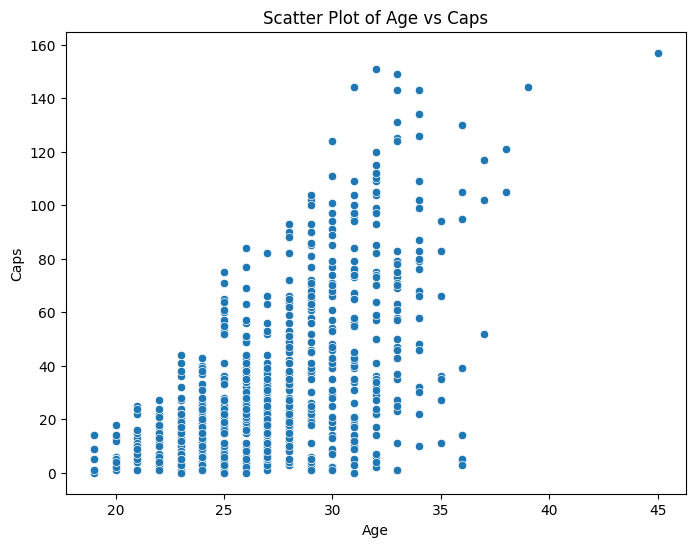


Analyzing relationship between Age and Goals:


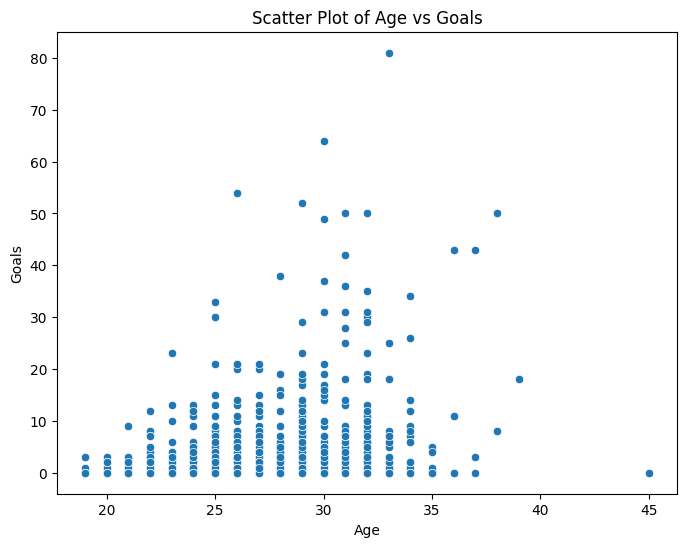


Analyzing relationship between Caps and Goals:


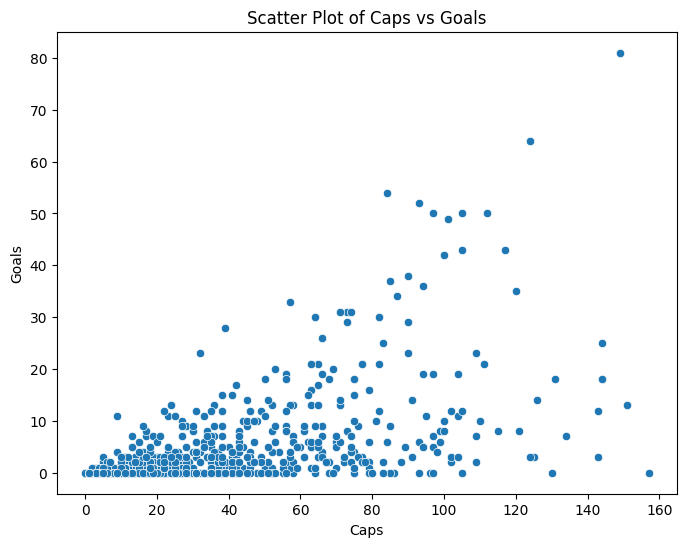

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, ks_2samp
from sklearn.linear_model import LinearRegression

# Function to plot relationships between columns
def analyze_relationship(df, col1, col2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Analyze relationships between pairs of continuous variables
continuous_columns = ['Age', 'Caps', 'Goals']
for i in range(len(continuous_columns)):
    for j in range(i + 1, len(continuous_columns)):
        col1 = continuous_columns[i]
        col2 = continuous_columns[j]
        print(f"\nAnalyzing relationship between {col1} and {col2}:")
        analyze_relationship(project, col1, col2)

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(project['Age'], project['Goals'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.3f}")



# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between Position and Goals.")
else:
    print("There is no statistically significant association between Position and Goals.")

Chi-squared statistic: 1048.865
There is a statistically significant association between Position and Goals.


In [ ]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Train Test Split
from sklearn.model_selection import train_test_split
# Accuarcy score
from sklearn.metrics import accuracy_score

In [ ]:
X = project[["Caps", "Age"]]
y = project.Goals
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# This is the beginning of the test train split
print(len(y_train))
print(len(project)*0.80)
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
prediction=classifier.predict(X_test)
print(prediction[0:100]) # This predicts the out come of the test train split.
accuracy= accuracy_score(y_test, prediction)
print(accuracy*100)
# This prints the aaccuracy of the train test split.

588
588.8000000000001
[0 0 0 0 0 0 1 1 1 0 2 1 2 0 4 0 0 0 0 0 1 0 0 8 0 0 0 0 0 0 6 0 4 3 3 6 0
 0 0 4 0 0 0 0 0 0 9 0 0 0 5 1 2 0 0 2 0 2 1 0 0 1 0 1 3 3 1 2 0 0 0 3 2 0
 2 0 0 0 7 0 0 0 0 0 0 4 0 2 0 2 0 0 2 0 0 0 0 2 0 3]
33.78378378378378


In [ ]:
# I used a train test split to try to predict the amount of goals a player had by their age and the amount of caps that they have./
# This was not a very sucsessful task due to the acuracy only being 34% at the highest.

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(project, x='Age', y='Goals', size='Age') # This is a bubble chart which is a chart that we have not used in class \
# that provides data about the age vs goals data.

In [ ]:
import seaborn as sns

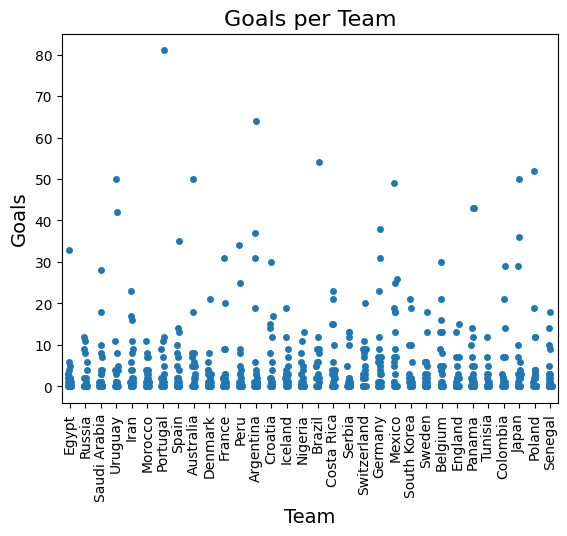

In [ ]:
sns.stripplot(data=project, x='Team', y='Goals')
plt.xticks(rotation=90)
plt.title('Goals per Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.show()
# This is a strip plot which we have not used in class that shows the amount of goals that every team scored in the world cup.